<a href="https://colab.research.google.com/github/epereirasg/Curso-de-Machine-Learning/blob/main/ProyectoFinal%20ML/%20Entrega%2004%20-%20Model/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Reconocimiento de Actividad Humana (HAR)


In [115]:
import tensorflow as tf
import pandas as pd  #Leer y escribir datos en diferentes formatos
from google.colab import drive #conecta Drive con Colab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split # divide conjuntos de entrenamiento y validaciones
from sklearn.preprocessing import StandardScaler # preprocesamiento de datos, en particular estandarizacion de datos.
import seaborn as sns

###Entrega 01 - OBTAIN

Incluir todo el código de la Etapa 01 - OBTAIN creada en la semana anterior

In [116]:
from google.colab import drive
drive = drive.mount("/content/drive")
#Debe tenerse en cuenta que con on_bad_lines='skip',salta las líneas malas sin levantar o avisar cuando se encuentran
dataset = pd.read_table("/content/drive/MyDrive/BasedeDatos/WISDM_ar_v1.1_raw.txt",  header=None, sep=',',on_bad_lines='skip')
dataset.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


###Entrega 02 - SCRUB

Eliminar filas con datos faltantes

*Uno de los pasos iniciales en la limpieza de datos consiste en eliminar aquellas filas que contengan datos faltantes. Estas líneas generalmente no aportan información y pueden complicar la etapa de entrenamiento y validación de muchos modelos predictivos.*


#notna

El método DataFrame.notna() devuelve un objeto booleano con el mismo número de filas y columnas que el DataFrame original. Si un elemento no es NaN, se asigna al valor True en el objeto booleano, y si un elemento es un NaN, se asigna al valor False.

In [117]:
dataset.info()
dataset.notna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086466 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   0       1086466 non-null  int64  
 1   1       1086466 non-null  object 
 2   2       1086466 non-null  int64  
 3   3       1086466 non-null  float64
 4   4       1086466 non-null  float64
 5   5       1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 49.7+ MB


,0,1,2,3,4,5
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
1086461,True,True,True,True,True,True
1086462,True,True,True,True,True,True
1086463,True,True,True,True,True,True
1086464,True,True,True,True,True,True


#DataFrame.dropna()
Pandas elimina las filas con valores NaN para todas las columnas utilizando el método DataFrame.dropna()

In [118]:
dataset.dropna()

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.690000
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.730000
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.690000
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.730000


Agregar al DataFrame los nombres de las columnas 

*En ocasiones al crear los data frames el sistema asigna nombres genéricos y correlativos a las columnas. Es recomendable renombrar las columnas por nombres significativos para favorecer el análisis posterior de los datos.*

In [119]:
dataset.columns = ['user', 'activity', 'time', 'x', 'y', 'z'] #Los nombres de las columnas de un DataFrame se pueden asignar mediante la propiedad columns.
#dataset.set_axis(['user', 'activity', 'time', 'x', 'y', 'z'], axis=1) #El método set_axis() de los DataFrame de Pandas permite modificar el nombre de los índices tanto de las filas como las columnas. 

Visualizar las 5 primeras filas del DataFrame (.head())

*Siempre es buena medida visualizar algunas líneas del dataframe para tener una idea concreta del contenido.*


In [120]:
dataset.head(5)

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Buscar datos nulos y eliminarlos si es que existen

In [121]:
# Controlando valores nulos, devuelve true si existen valores nulos
dataset.isnull().any().any()


True

El método nos devuelve el valor "True", lo que indica que existen valores nulos en nuestro dataset. Estos valores pueden tener una influencia significativa en nuestro modelo predictivo, por lo que siempre es una decisión importante determinar la forma en que los vamos a manejar. Las alternativas que tenemos son:

1.Dejarlos como están, lo que a la larga nos va a traer bastantes dolores de cabeza ya que en general los algoritmos no los suelen procesar correctamente y provocan errores.

2.Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo. Es la técnica que seguiremnos en este caso, pues fue lo sugereido.

Se podia además:

3.Inferir su valor. En este caso, lo que podemos hacer es tratar de inferir el valor faltante y reemplazarlo por el valor inferido. Esta suele ser generalmente la mejor alternativa a seguir.

Existen valores ausentes, identificados como NaN. En este caso tenemos datos del tipo categóricos y datos numéricos, podiamos inferir los valores faltantes utilizando la media aritmética para los datos cuantitativos y la moda para los datos categóricos.


In [122]:
# Agrupando columnas por tipo de datos
tipos = dataset.columns.to_series().groupby(dataset.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos.

1

In [123]:
# Armando lista de columnas numéricas
columnas = dataset.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

5

In [124]:
dataset.isnull().any().sum() # conocer la suma de los valores nulos

1

In [125]:
dataset.dropna(inplace=True) #Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo. Es la técnica
dataset.isnull().any().sum()




0

Visualizar los tipo de datos a los que pertenece cada columna (.info())

*Es necesario tener un detalle de cuantas variables están considerando y el tipo de datos que pertenecen para verificar si es posible utilizarla directamente para el modelo predictivo o si es necesario realizar una transformación del tipo de dato.*


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.0+ MB


Cambiar el tipo de datos de las variables predictoras a valores reales, para realizar la clasificación 

*Muchas de las variables contenidas en el DataFrame originalmente se encuentran en el tipo de dato 'object'. En ese formato las variables no pueden ser interpretadas como vectores. Recordemos que la mayoría de los modelos de Machine Learning estudiados operan en el espacio vectorial. Por esta razón las variables que formarán parte del modelo predictivo deben ser transformadas a un formato numérico como 'Float' o 'integer'.*

Para este proyecto en particular se pide transformar  al tipo de dato Float, las variables del acelerómetro en el eje $x$, $y$ y $z$



In [127]:
#dataset['x'] = dataset['x'].astype(float, errors = 'raise') #astype() En pandas proporcionan el método astype() para convertir una columna a un tipo específico. Pasamos float al método y ponemos el parámetro errors como 'raise', lo que significa que elevará las excepciones para los valores inválidos. 
#dataset['y'] = dataset['y'].astype(float, errors = 'raise')
#dataset['z'] = dataset['z'].astype(float, errors = 'raise')
# conversión del tipo de objeto a flotante usando to_numeric()
dataset['x'] = pd.to_numeric(dataset['x'],errors = 'coerce') 
dataset['y'] = pd.to_numeric(dataset['y'],errors = 'coerce')
dataset['z'] = pd.to_numeric(dataset['z'],errors = 'coerce')

Imprimir los tipos de datos de las variables del DataFrame

*Se recomienda volver a ejecutar el comando info para verificar que efectivamente las variables cambiaron su tipo de dato y que ahora se pueden procesar con los modelos predictivos.*


In [128]:
dataset.info()
dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1086465 entries, 0 to 1086465
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1086465 non-null  int64  
 1   activity  1086465 non-null  object 
 2   time      1086465 non-null  int64  
 3   x         1086465 non-null  float64
 4   y         1086465 non-null  float64
 5   z         1086465 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 58.0+ MB


,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


Eliminar las columnas que no se utilizaran para la clasificación

*En este caso deberíamos conservar la actividad respectiva y las variables asociadas al acelerómetro*


#drop
El método drop también se puede utilizar para eliminar más de una columna. Lo que se puede conseguir al indicar como argumento una lista con más de un nombre.

In [129]:
dataset1=dataset.drop(['user', 'time'], axis=1)
dataset1.head(5)


,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


Utilizar el comando *value_counts* para obtener un detalle de cuantas instancias se tienen por actividad. El objetivo consiste en identificar la presencia del balance o desbalance en las categorías a modelar


In [130]:
dataset1['activity'].value_counts()


Walking       418393
Jogging       336445
Upstairs      122869
Downstairs    100425
Sitting        59939
Standing       48394
Name: activity, dtype: int64

Este proyecto considera datos con un desbalance de clases. Es necesario balancearlos para que los modelos operen de manera adecuada. Existen muchas maneras de realizar un balance, pero en este proyecto utilizaremos una estrategia sencilla e intuitiva. Simplemente debe identificar la actividad que contenga el número menor de instancias. Se debe realizar un muestreo para las otras actividades utilizando ese valor. De esta manera todas las clases tendrán la misma cantidad de instancias. 



In [131]:
#1. Forma de Balancear, el tamaño de la base de datos balanceada mayor que en la segunda forma

lista=dataset1['activity'].value_counts() # el menor valor de instancias en la variable nombrada menor
menor=min(lista)
print(menor)
 # acotar por el menor valor detectado en la variable menor 
 # recorrer el datafreme y asignar el valor
#for i in lista.index: 
    #lista[i]=menor  

dataset1=dataset1.groupby('activity').head(menor).iloc[0:menor*6]



#2. Forma de Balancear, el tamaño de la base de datos balanceada es menor
Walking = dataset1[dataset1['activity']=='Walking'].head(3555).copy() # para almacenar en una copia
Jogging = dataset1[dataset1['activity']=='Jogging'].head(3555).copy() 
Upstairs = dataset1[dataset1['activity']=='Upstairs'].head(3555).copy() 
Downstairs = dataset1[dataset1['activity']=='Downstairs'].head(3555).copy() 
Sitting = dataset1[dataset1['activity']=='Sitting'].head(3555).copy() 
Standing = dataset1[dataset1['activity']=='Standing'].head(3555).copy() 
balance=pd.DataFrame() #  Se cre un datafreme con los datos balanceados
balance=balance.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balance.shape






48394


(21330, 4)

Establecer el número de instancias y dimensiones del data frame resultante *(shape)*


In [101]:
print(dataset1.shape)

(290364, 4)


Volver a imprimir la cantidad de instancias por categoría para verificar que todo esté en orden. *(value_counts)*

In [133]:
balance['activity'].value_counts()
print(balance['activity'])

597        Walking
598        Walking
599        Walking
600        Walking
601        Walking
            ...   
257316    Standing
257317    Standing
257318    Standing
257319    Standing
257320    Standing
Name: activity, Length: 21330, dtype: object


Volver a visualizar las cinco primeras líneas del DataFrame para revisar que todo esté en orden *(head)*


In [134]:
balance.head(5)

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


Separar las variables predictoras (X) de las ctegorias o etiquetas (y)

In [135]:
# split dataset
X = balance.iloc[:, 1:4] ## X corresponde a las variables independientes
yresult = balance.iloc[:, 0] ## y se usa para denotar la variable objetivo o Target
X.head(5)

,x,y,z
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638


Estandarizar los datos numericos (*StandardScaler)*

*Para el caso de la estandarización de los datos se pueden usar distintas técnicas, como la normalización 01, estandarización entre -1 y 1 o el denominado Z-Score. En este caso usaremos la función Standard Scaler de Python con sus valores por defecto.*


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, yresult, random_state=0, test_size=0.2)
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X.head(5)

,x,y,z
597,0.844462,8.008764,2.792171
598,1.116869,8.621680,3.786457
599,-0.503953,16.657684,1.307553
600,4.794363,10.760075,-1.184970
601,-0.040861,9.234595,-0.694638


Como último paso debe reconstruir el dataframe pegando las columnas de los variables predicadores (X) y las categorías (y)


In [137]:
datanew=pd.concat([X, yresult], axis=1)
datanew.head()

,x,y,z,activity
597,0.844462,8.008764,2.792171,Walking
598,1.116869,8.621680,3.786457,Walking
599,-0.503953,16.657684,1.307553,Walking
600,4.794363,10.760075,-1.184970,Walking
601,-0.040861,9.234595,-0.694638,Walking


###Entrega 03 - EXPLORE

In [138]:
# Primaramente en esta etapa exploraremos características de los datos
print('Cantidad de Filas y columnas:',datanew.shape)
print('Nombre columnas:',datanew.columns)
datanew.describe() # nos da estadísticas sobre los datos}

Cantidad de Filas y columnas: (21330, 4)
Nombre columnas: Index(['x', 'y', 'z', 'activity'], dtype='object')


,x,y,z
count,21330.000000,21330.000000,21330.000000
mean,0.842585,8.517187,1.655158
std,3.727271,5.125860,3.364686
min,-14.246883,-13.443283,-14.982383
25%,-1.120000,6.510526,-0.531194
50%,0.653777,9.340000,1.225831
75%,3.170000,10.651112,2.955615
max,18.727978,19.572440,17.924377


In [139]:
# Se puede agrupar por actividad, por ejemplo en este caso todos los valores de la variable x se dividen según la actividad.
# Podemos explorar el comportamiento de las restantes variables
import statsmodels.api as sm
import seaborn as sns
datanew.groupby('activity')['x'].value_counts()

activity    x        
Downstairs  -1.076008    29
            -0.653777    29
            -0.572055    25
            -0.231546    24
            -0.803601    23
                         ..
Walking      8.730643     1
             8.853226     1
             9.003050     1
             9.152874     1
             9.193735     1
Name: x, Length: 2482, dtype: int64

La correlación es un factor fundamental fundamental para los científicos de datos. Indica cómo las variables de un conjunto de datos se relacionan entre sí y cómo se mueven entre sí. El valor de correlación varía de -1 a +1. Podemos trazar el array de correlación utilizando el módulo seaborn. Ayuda a comprender el conjunto de datos fácilmente y se utiliza con mucha frecuencia para el trabajo de análisis. En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación

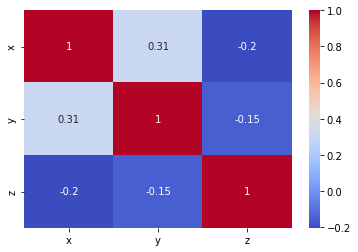

In [140]:
# Representación del mapa de calor 
sns.heatmap(datanew.corr(), annot = True, cmap = 'coolwarm') 

Pandas funciona bien para manejar y trazar diferentes entradas dentro de un conjunto de datos. Primero veremos una forma de visualizar ciertas distribuciones de características utilizando gráficos de densidad y veremos si podemos agruparlos por actividad. Luego podemos obtener el diagrama de densidad correspondiente de la siguiente manera:

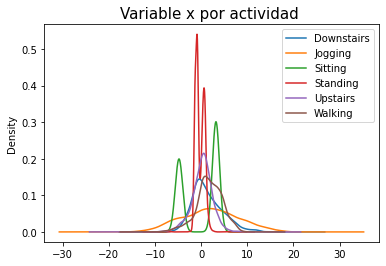

In [141]:
plt.title('Variable x por actividad ', fontsize=15)
ax = datanew.groupby('activity')['x'].plot(kind='kde', legend = True)

El siguiente gráfico nos ilustra la cantidad de instancias por actividad, en este caso era de esperar el resultado porque habiamos balanceado anteriormente los datos.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


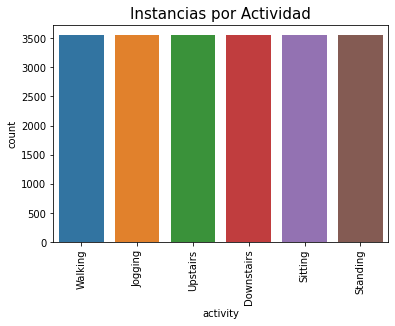

In [142]:
plt.title('Instancias por Actividad', fontsize=15)
sns.countplot(datanew.activity)
plt.xticks(rotation=90)
plt.show()

In [143]:
datanew.activity.value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [144]:
datanew.x.head(n=15)

597    0.844462
598    1.116869
599   -0.503953
600    4.794363
601   -0.040861
602    2.492524
603    0.531194
604    1.757025
605    2.982856
606   -0.803601
607    0.190685
608   -0.340509
609    0.463092
610    0.081722
611   -0.762740
Name: x, dtype: float64

El histograma de frecuencia es un gráfico que se usa para presentar las frecuencias absolutas de los valores de una distribución en el cual la altura del punto asociado a un valor de las variables es proporcional a la frecuencia de dicho valor. A diferencia de un gráfico de barra, el histograma de frecuencia los rangos en el eje x son continuos. 

Se visualiza un gráfico de dispersión, donde se ve la relacion entre la variable (y) y la variable (x) , para cada una de las actividades le asociamos un color.

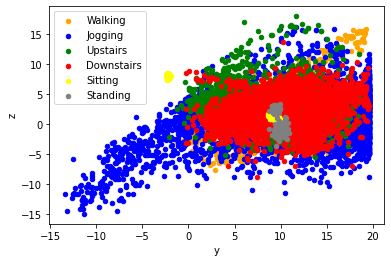

In [145]:
#Variable y VS variable z. Este gráfico muestra la relación entre la variable(y) y la variable (z), según las actividades.
# en este caso se ven m'as concentrado los datos en la actividad Standing
fig = datanew[datanew.activity=='Walking'].plot(kind='scatter',x='y',y='z',color='orange', label='Walking')
datanew[datanew.activity=='Jogging'].plot(kind='scatter',x='y',y='z',color='blue', label='Jogging', ax=fig)
datanew[datanew.activity=='Upstairs'].plot(kind='scatter',x='y',y='z',color='green', label='Upstairs', ax=fig)
datanew[datanew.activity=='Downstairs'].plot(kind='scatter',x='y',y='z',color='red', label='Downstairs', ax=fig)
datanew[datanew.activity=='Sitting'].plot(kind='scatter',x='y',y='z',color='yellow', label='Sitting', ax=fig)
datanew[datanew.activity=='Standing'].plot(kind='scatter',x='y',y='z',color='gray', label='Standing', ax=fig)
fig.set_xlabel("y")
fig.set_ylabel("z")
plt.show()


(array([  43.,  180., 2105., 3205., 8661., 5385., 1130.,  410.,  169.,
          42.]),
 array([-14.246883 , -10.9493969,  -7.6519108,  -4.3544247,  -1.0569386,
          2.2405475,   5.5380336,   8.8355197,  12.1330058,  15.4304919,
         18.727978 ]),
 <a list of 10 Patch objects>)

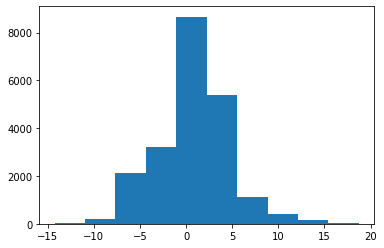

In [146]:
len(datanew.x)
plt.hist(datanew.x) 


(array([  39.,   87.,  106., 1650., 1010., 2319., 8179., 4700., 1963.,
        1277.]),
 array([-13.443283 , -10.1417107,  -6.8401384,  -3.5385661,  -0.2369938,
          3.0645785,   6.3661508,   9.6677231,  12.9692954,  16.2708677,
         19.57244  ]),
 <a list of 10 Patch objects>)

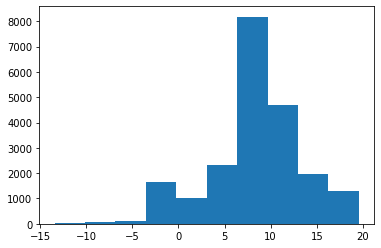

In [147]:
plt.hist(datanew.y) 

(array([  23.,   78.,  276., 1747., 9343., 6552., 2457.,  715.,   95.,
          44.]),
 array([-14.982383, -11.691707,  -8.401031,  -5.110355,  -1.819679,
          1.470997,   4.761673,   8.052349,  11.343025,  14.633701,
         17.924377]),
 <a list of 10 Patch objects>)

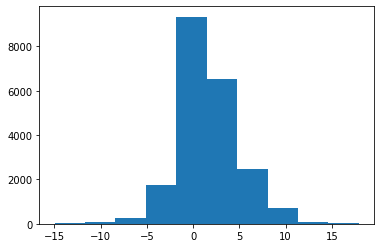

In [148]:
plt.hist(datanew.z) 

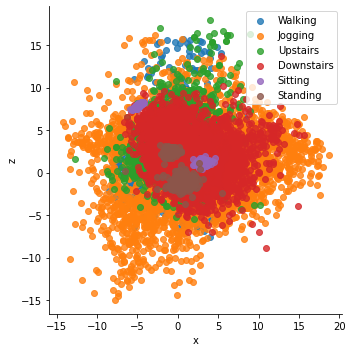

In [149]:
# Se concentran los valores de las variables x, z según la actividad}
sns.lmplot(x="x", y="z", data=datanew, hue="activity", fit_reg=False, legend=False)
plt.legend()
plt.show()



Otra perspectiva de los datos consiste en la construcción de diagramas de caja. En este caso se construyeron “boxplot” para cada una de las seis actividades utilizando la variable x

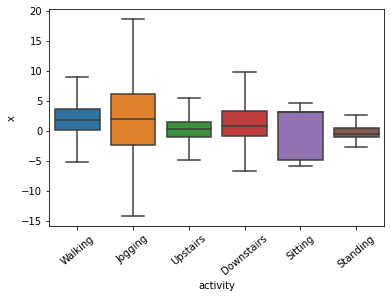

In [150]:
sns.boxplot(x='activity', y='x', data = datanew, showfliers=False)
plt.xticks(rotation = 40)
plt.show()

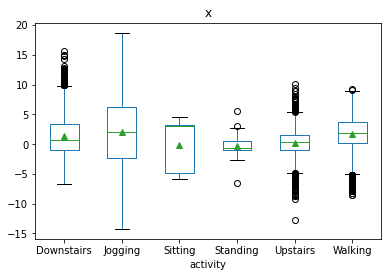

In [151]:
# let us try with x and activity that are two continuous features
# Este diagrama se utiliza para detectar valores atípicos
ax=datanew.boxplot(column=['x'], by='activity', showbox=True, showmeans=True, grid=False)
ax=plt.suptitle('')

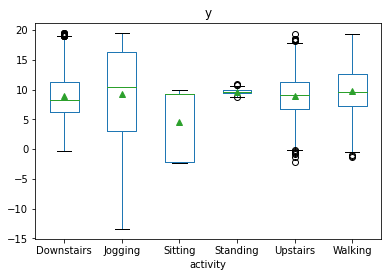

In [152]:
# let us try with y and activity that are two continuous features
ax=datanew.boxplot(column=['y'], by='activity', showbox=True, showmeans=True, grid=False)
ax=plt.suptitle('')

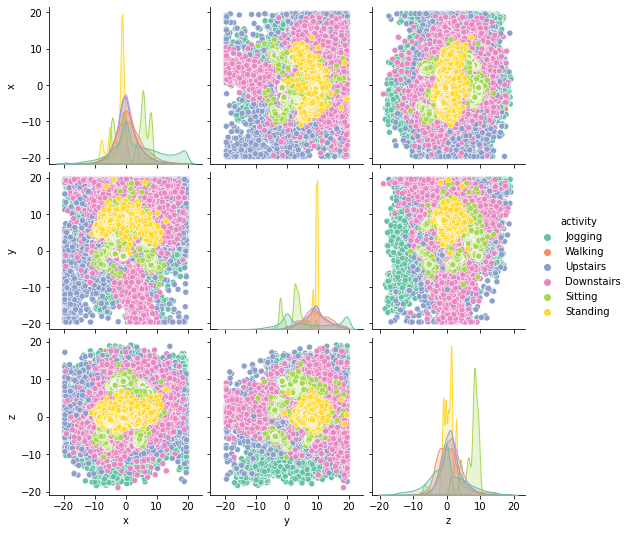

In [ ]:
#Visualizar las similitudes y diferencias entre las actividades
sns.pairplot(data=datanew, hue='activity', palette='Set2')

###Entrega 04-MODEL

In [107]:
from sklearn.svm import SVC #utilizar SVM
from sklearn import metrics #para comprobar la precisión del modelo
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier #utilizar Random Forest
from sklearn import datasets #importar conjunto de datos
import xgboost as xgb #utilizar xgboost

##SVC: Máquinas de Vector Soporte (Vector Support Machines, SVMs) 
Es un algoritmo de clasificación y regresión desarrollado en la década de los 90, dentro del campo de la ciencia computacional. Aunque inicialmente se desarrolló como un método de clasificación binaria, su aplicación se ha extendido a problemas de clasificación múltiple y regresión. SVMs ha resultado ser uno de los mejores clasificadores para un amplio abanico de situaciones, por lo que se considera uno de los referentes dentro del ámbito de aprendizaje estadístico y machine learning.

In [108]:
#Separando los datos en dos partes

#La submatriz 'x_svm' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
x_svm=datanew.iloc[:,0:3]
x_svm

,x,y,z
0,-0.694638,12.680544,0.503953
1,5.012288,11.264028,0.953424
2,4.903325,10.882658,-0.081722
3,-0.612916,18.496431,3.023717
4,-1.184970,12.108489,7.205164
...,...,...,...
1083927,-4.990000,8.390000,-0.380000
1083928,-5.130000,8.240000,-0.420000
1083929,-4.560000,8.500000,-0.890000
1083930,-4.480000,8.540000,-1.080000


In [109]:
#El vector contiene los valores de la columna 3 'activity' con todas las filas
y_svm=datanew.iloc[:,3]
y_svm

0           Jogging
1           Jogging
2           Jogging
3           Jogging
4           Jogging
             ...   
1083927    Standing
1083928    Standing
1083929    Standing
1083930    Standing
1083931    Standing
Name: activity, Length: 290364, dtype: object

In [110]:
# Se dividen los datos en conjunto de entrenamiento y prueba.{
#70% datos de entrenamiento 30% datos de test, pueden considerarse otras divisiones( por ejemplo: 50% y 50% ó 80% y 20%)
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [111]:
print("Tamaño de los datos de train: ", len(x_train_svm))
print("Tamaño de los datos de test: ", len(x_test_svm))

Tamaño de los datos de train:  203254
Tamaño de los datos de test:  87110


In [112]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(203254, 3)
(203254,)
(87110, 3)
(87110,)


Modelado (SVM con aprendizaje Scikit)

El algoritmo SVM ofrece elegir funciones para realizar su procesamiento. Básicamente, mapear los datos en un espacio dimensional más alto se llama kernelling. La función matemática utilizada para la transformación se conoce como la función kernel, y puede ser de distintos tipos, a ser:

    Lineal
    Polimonial
    Función de base Radial (RBF)
    Sigmoide

Cada una de estas funciones tiene sus características, pros y contras y su ecuación, pero como no hay una forma sencilla de saber la función que mejor funcionaría, elegimos utilizar diferentes funciones y comparar los resultados. Utilicemos la función por omisión, RBF (Función Basada en Radio) para este lab.

In [113]:
# Aplicando el modelo 
model = SVC(kernel='rbf')
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svm
model.fit(x_train_svm, y_train_svm)

SVC()

Predecir los resultados del conjunto de pruebas [***test***]

In [114]:
pred_svm = model.predict(x_test_svm) 

In [ ]:
print(classification_report(y_test_svm, pred_svm))
print(confusion_matrix(y_test_svm, pred_svm))
acc_svm = metrics.accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)

###Random Forest
Es un algoritmo de aprendizaje automático se puede utilizar tanto para tareas de clasificación como de regresión.Consta de muchos árboles de decisión. Utiliza embolsado y aleatoriedad de características al construir cada árbol individual para tratar de crear un bosque de árboles no correlacionados cuya predicción  es más precisa que la de cualquier árbol individual.


In [ ]:
#Separando la matriz en dos partes
#La submatriz 'X_rf' contiene los valores de las primeras 3 columnas del conjunto de datos y todas las filas
X_rf = datanew.iloc[:, 0:3]
X_rf

In [ ]:
#El vector contiene los valores de la columna 4 'activity' con todas las filas
y_rf = iris.iloc[:, 3]
y_rf

In [ ]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.3)

In [ ]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
#Recomendación: Revisar los parámetros del clasificador https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

classifier.fit(X_train_rf, y_train_rf)

In [ ]:
#Predicción de los resultados del conjunto de pruebas
y_pred_rf = classifier.predict(X_test_rf)

In [ ]:
#Hacer la matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

In [ ]:
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))
print(confusion_matrix(y_test_rf, y_pred_rf))
acc_rf = metrics.accuracy_score(y_pred_rf, y_test_rf)
print('The accuracy of the Random forest is:', acc_rf)

###XG Boost

In [ ]:
from sklearn import datasets

X_boost = datanew.data
y_boost = datanew.target

In [ ]:
X_boost

In [ ]:
y_boost

In [ ]:
#Dividir las matrices en 70% training, 30% testing
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.3)

In [ ]:
print("Train data length:",len(X_train_boost));
print("Test data length:",len(X_test_boost));

In [ ]:
#Creación del formato de datos Xgboost DMatrix (a partir de los arreglos ya obtenidos)

import xgboost as xgb

d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [ ]:
#Configuración de algunos parámetros. Recomendación: revisar https://xgboost.readthedocs.io/en/stable/parameter.html 

parameters = {'eta': 0.3, 'silent': True, 'objective': 'multi:softprob', 'num_class': 3, 'max_depth': 3}  
num_round = 20

In [ ]:
#Entrenar el modelo
bst = xgb.train(parameters, d_boosttrain, num_round)

In [ ]:
#predicción
preds = bst.predict(d_boosttest)

In [ ]:
preds[:5]

In [ ]:
#Seleccionar la columna que representa la mayor probabilidad 
#(tenga en cuenta que, para cada línea, hay 3 columnas, que indican la probabilidad de cada clase)

best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

In [ ]:
#Hacer la matriz de confusión
m = confusion_matrix(y_test_boost, best_preds)
m

In [ ]:
#calculando la precisión 

print(precision_score(y_test_boost, best_preds, average='macro'))